#**1. Importing Required Packages** 

In [3]:
#importing tensorflow.compat.v1 and disabling v2 behaviour

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [4]:
import numpy as np #for storing dataset
import matplotlib.pyplot as plt #for plotting purpose

#**2.Loading fashion_mnsit Dataset**

In [5]:
#load fashion mnist dataset using keras

def load_data():
  
  fashion_mnist = tf.keras.datasets.fashion_mnist
  (train_image_data, train_classes), (test_image_data, test_labels) = fashion_mnist.load_data()
  train_image_data=train_image_data/255.0
  test_image_data=test_image_data/255.0
  return (train_image_data,train_classes,test_image_data,test_labels);

In [6]:
#downloading data and will store in four numpy arrays

train_image_data,train_classes,test_image_data,test_labels=load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
#labels for claasified data
classification_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#**3. Exploring Dataset**

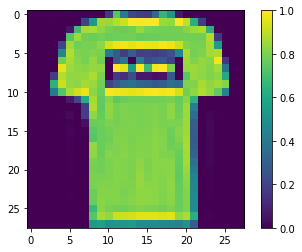

In [8]:
#plotting a sample image from train data

plt.imshow(train_image_data[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_image_data.shape

(60000, 28, 28)

In [10]:
test_image_data.shape

(10000, 28, 28)

#**4. Randomally Splitting Training Data into Train Set and Validation Set**


In [12]:
#split train data into train set and validation set using given fraction size of validation set

def split_train_data(train_image_data,validation_set_size,seed_val):
  
  from sklearn.model_selection import train_test_split
  train_set, validation_set, train_labels,validation_labels = train_test_split(train_image_data, train_classes, test_size=validation_set_size, random_state=seed_val)
  return (train_set, validation_set, train_labels,validation_labels);

In [13]:
train_set, validation_set, train_labels,validation_labels=split_train_data(train_image_data,validation_set_size=0.15,seed_val=40)

#**5. Exploring Splitted Dataset**

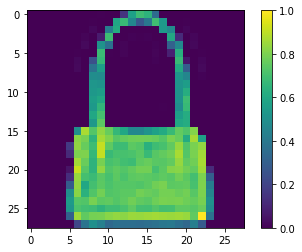

In [14]:
#plotting a sample image from train set

plt.imshow(train_set[5])
plt.colorbar()
plt.grid(False)
plt.show()

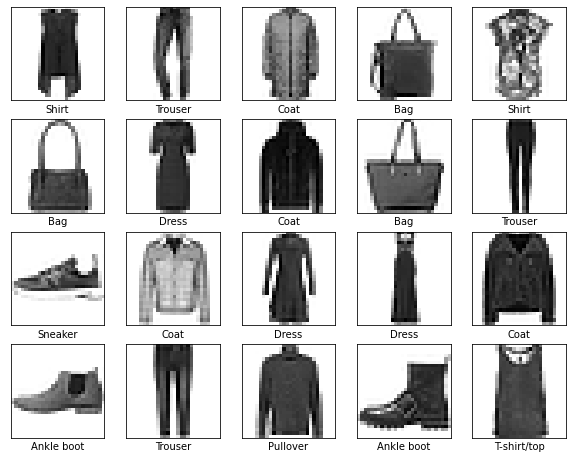

In [15]:
#plotting some train set images with their provided labels

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i], cmap=plt.cm.binary)
    plt.xlabel(classification_labels[train_labels[i]])
plt.show()

In [16]:
train_set.shape

(51000, 28, 28)

In [17]:
validation_set.shape

(9000, 28, 28)

#**6. Setting Parameters and Hyperparameters**

In [18]:
#Parameters

n_input = 28 # Fashion MNIST img shape: 28*28, so each row has 28 entries ,and one row will be input
n_timesteps = 28 # Timesteps in RNN, as 28 rows are there and one time one row will be input so 28 timesteps
n_labels = 10 # fashion MNIST total classes (0-9 digits)

In [19]:
#Hyperparameters

learning_rate = 0.001
n_hidden_states = 100 # hidden layer: num of features

#**Building CNN**

In [20]:
#Clears the default graph stack and resets the global default graph.

tf.reset_default_graph()

In [21]:
#placeholders for the 'inputs'  and 'outputs'

inputs = tf.placeholder(tf.float32, [None, n_timesteps, n_input,1])
outputs = tf.placeholder(tf.int32, [None])
keep_prob = tf.placeholder(tf.float32)

In [26]:
  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(inputs=inputs,filters=32,kernel_size=[5, 5],padding="same",activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 
  conv2 = tf.layers.conv2d(inputs=pool1,filters=64,kernel_size=[5, 5],padding="same", activation=tf.nn.relu)

  #Pooling Layer #2
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
  dropout = tf.layers.dropout( inputs=dense, rate=0.8)

  # Logits Layer
  logits = tf.layers.dense(inputs=dropout, units=10)
  predictions = {"classes": tf.argmax(input=logits, axis=1),"probabilities": tf.nn.softmax(logits, name="softmax_tensor")}

  # Loss Function
  x_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=outputs, logits=tf.reshape(logits, shape=(-1, n_labels)), name='softmax_cross_entropy')
  loss = tf.reduce_mean(x_entropy, name='loss')
  loss_summary = tf.summary.scalar('loss_summ', loss)

  #Accuracy

  optimizer = tf.train.AdamOptimizer(learning_rate=0.001, name='Adam_optimizer')
  training_optimizer = optimizer.minimize(loss)
  correct = tf.nn.in_top_k(tf.reshape(logits, (-1, n_labels)), outputs, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='Accuracy')
  accuracy_summary = tf.summary.scalar('Acc_Summary', accuracy)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  warnings.warn('`tf.layers.conv2d` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/pooling.py:310: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling2D` instead.
  warnings.warn('`tf.layers.max_pooling2d` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecate

#**Training and Validation**

In [27]:
#initializing all the global variables

init = tf.global_variables_initializer()

In [28]:
#reshaping the validation set

X_validation = validation_set
Y_validation = validation_labels
X_validation = X_validation.reshape([-1, n_timesteps, n_input,1])

In [39]:
#defining variables to implement "Early Stopping"

patience=5 # patience for Early Stopping
epochs_without_improvement=0
best_loss=np.infty #best_loss upto the last epoch

In [30]:
#defining list to create graphs later to analyze trained model

train_acc=[] #contain training accuracy of every epoch
validation_acc=[] #contain validation accuracy of every epoch
train_loss=[]  #contain training loss of every epoch
validation_loss=[]  #contain validation loss of every epoch

**Training and Validation**

In [37]:
#to save the best model and restore later
saver = tf.train.Saver()

In [38]:
#function to return next batch of train set to be sent to train model

def next_batch(current_batch,batch_size,train_set,train_labels):

  i=current_batch*batch_size
  j=(current_batch+1)*batch_size
  X_train=train_set[i:j]
  Y_train=train_labels[i:j]
  return X_train,Y_train;


In [40]:
batch_size = 250 #barch size to train model
n_epochs = 100 

with tf.Session() as sess:
    sess.run(init) 

    #number of barches(iterations) to complete one epoch
    n_batches = train_set.shape[0] // batch_size

    for epoch in range(n_epochs):
        for current_batch in range(n_batches):
            
            X_train,Y_train=next_batch(current_batch,batch_size,train_set,train_labels)
            X_train = X_train.reshape([-1, n_timesteps, n_input,1])

            #running optimization(Back Propogation) with dropout(retention probability) 0.8
            sess.run(training_optimizer, feed_dict={inputs: X_train, outputs: Y_train ,keep_prob: 0.8})

        #calculating loss and accuracy after completion of epoch for train set
        loss_train, acc_train = sess.run([loss, accuracy], feed_dict={inputs: X_train, outputs: Y_train,keep_prob: 0.8})

        #calculating loss and accuracy after completion of epoch for validation set
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={inputs: X_validation, outputs: Y_validation,keep_prob: 1.0})

        #appending data to lists to plot graphs later
        train_loss.append(loss_train)
        train_acc.append(acc_train)
        validation_loss.append(loss_val)
        validation_acc.append(acc_val)

        if epoch%5==0:
          print('Epoch {}:\nTrain Loss: {:.3f}, Train Acc: {:.3f}'.format( epoch + 1, loss_train, acc_train))
          print('Validation Loss: {:.3f}, Validation Acc: {:.3f}\n'.format(loss_val, acc_val))

          if best_loss>loss_val:
            #if train loss improved
            best_loss=loss_val

            #saving current best model
            saver.save(sess, "/logs_rnn/my_best_model.ckpt")
          else:
            epochs_without_improvement+=1

            #early stopping if perfomance is not improving over k(patience) iterations
            if epochs_without_improvement>=patience:
              print("\nEarly stopping at epoch {} ".format(epoch+1))
              break


Epoch 1:
Train Loss: 0.354, Train Acc: 0.848
Validation Loss: 0.338, Validation Acc: 0.879

Epoch 6:
Train Loss: 0.135, Train Acc: 0.952
Validation Loss: 0.251, Validation Acc: 0.910

Epoch 11:
Train Loss: 0.072, Train Acc: 0.976
Validation Loss: 0.285, Validation Acc: 0.911

Epoch 16:
Train Loss: 0.029, Train Acc: 0.992
Validation Loss: 0.333, Validation Acc: 0.914

Epoch 21:
Train Loss: 0.025, Train Acc: 0.996
Validation Loss: 0.436, Validation Acc: 0.911

Epoch 26:
Train Loss: 0.005, Train Acc: 1.000
Validation Loss: 0.511, Validation Acc: 0.909

Epoch 31:
Train Loss: 0.002, Train Acc: 1.000
Validation Loss: 0.544, Validation Acc: 0.916


Early stopping at epoch 31 


In [41]:
test_image_data=test_image_data.reshape([-1, n_timesteps, n_input,1])

In [42]:
#Restoring saved model from "/logs_rnn/my_best_model" and testing on testdata

with tf.Session() as sess:
    saver.restore(sess, "/logs_rnn/my_best_model.ckpt") #restored model

    #testing model on testdata
    loss_test, acc_test = sess.run([loss, accuracy], feed_dict={inputs: test_image_data, outputs: test_labels,keep_prob: 1.0})
    print('Test Loss: {:.3f}, Test Acc: {:.3f}'.format(loss_test, acc_test))

INFO:tensorflow:Restoring parameters from /logs_rnn/my_best_model.ckpt
Test Loss: 0.261, Test Acc: 0.907


#**Graph Plots**

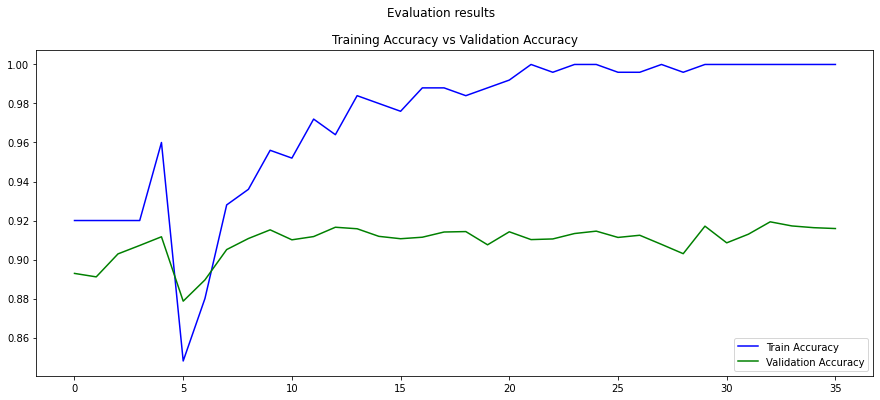

In [43]:
#plotting graph between training acuracy vs validation accuracy

fig, (ax1) = plt.subplots(1, figsize=(15,6))
fig.suptitle('Evaluation results')
ax1.set_title("Training Accuracy vs Validation Accuracy")
ax1.plot(range(len(train_acc)), train_acc, color="b", label="Train Accuracy")
ax1.plot(range(len(validation_acc)), validation_acc, color="g", label="Validation Accuracy")
ax1.legend(loc='lower right')

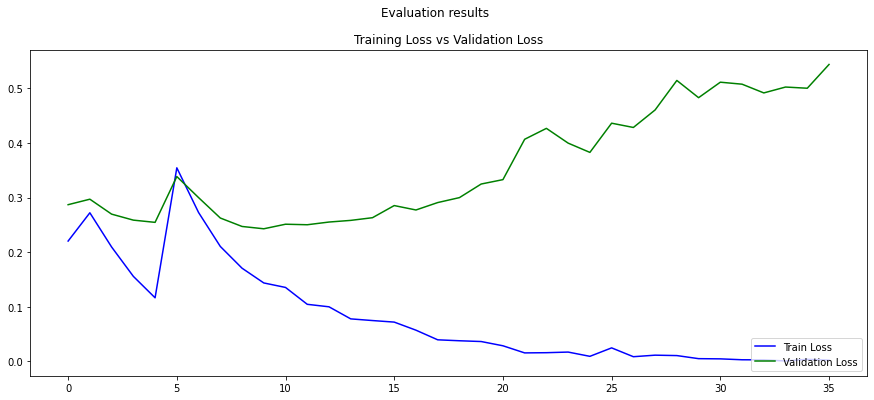

In [44]:
#plotting graph between training loss vs validation loss

fig, (ax2) = plt.subplots(1, figsize=(15,6))
fig.suptitle('Evaluation results')
ax2.set_title("Training Loss vs Validation Loss")
ax2.plot(range(len(train_loss)), train_loss, color="b", label="Train Loss")
ax2.plot(range(len(validation_loss)), validation_loss, color="g", label="Validation Loss")
ax2.legend(loc='lower right')